In [18]:
# Zadanie 1
# Napisz funkcje rysuj_ramki_szare(w,h,grub, ?) oraz rysuj_pasy_pionowe_szare(w,h,grub. ?)
# analogiczne do rysuj_ramki(w,h,grub) oraz rysuj_pasy_pionowe(w,h,grub) w wyniku których
# otrzymasz obraz w trybie L taki, że zamiast czarnego i białego koloru pojawiają się odcienie
# szarości (według własnego uznania, ale według ustalonej reguły, którą trzeba będzie opisać).
# 
# dla funkcji rysuj_ramki_szare(w,h,grub, ?), podajesz dodatkowe 2 parametry,
# od których będą zaczynały się kolory poszczególnych ramek, parametr kolor_ramki - czyli kolor początkowy tych ramek,
# które jak by będą rysowali się, oraz parametr kolor_tla - czyli początkowy kolor samego tła, na którym będą rysować się ramki.
# w rzeczywistości, to dwa parametry , dwóch rożnych ramek, ktore idą jedna za drugą.
# Każda następna ramka jest o 13 jednostek jaśniejsza od poprzedniej, i to dotyczy oboch ramek.
#
# dla funkcji rysuj_pasy_pionowe_szare(w, h, grub, ?), podajesz dodatkowy jeden parametr,
# jest to początkowy kolor paska. Od tego koloru, każdy następny będzie jaśniejszy od poprzedniego
# na 10 jednostek, przy czym, jeżeli jasność wyjdzie za przedziały, czyli jak będzie większa
# od 255 jednostek to zastosować funkcje modulo 256, zatem kolor będzie znów się zaczynał od cimnego odcienia.

In [7]:
def rysuj_ramki_szare(w, h, grub, kolor_ramki, kolor_tla):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    koef = min(int(w / (2*grub)), int(h / (2*grub)))

    for i in range(0, koef):
        if(i % 2 == 0):
            tab[grub*i:(h - grub*i), grub*i:(w - grub*i)] = kolor_ramki
            if(kolor_ramki + 13 < 255):
                kolor_ramki += 13
        else:
            tab[grub*i:(h - grub*i), grub*i:(w - grub*i)] = kolor_tla
            if (kolor_tla + 13 < 255):
                kolor_tla += 13


    return Image.fromarray(tab)

rysuj_ramki_szare(300, 200, 5, 70, 160).show()

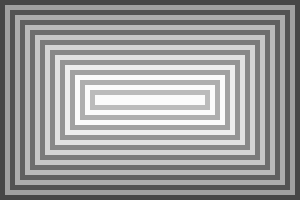

In [8]:
rysuj_ramki_szare(300, 200, 5, 70, 160)

In [10]:
def rysuj_pasy_pionowe_szare(w, h, grub, kolor_ramki):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(w/grub)

    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(h):
                tab[j, i] = kolor_ramki
        kolor_ramki = (kolor_ramki + 10) % 256

    return Image.fromarray(tab)

rysuj_pasy_pionowe_szare(300, 200, 5, 70).show()

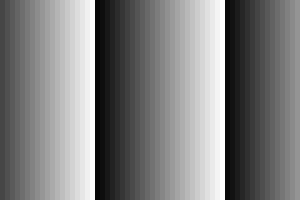

In [11]:
rysuj_pasy_pionowe_szare(300, 200, 5, 70)

In [57]:
# Zadanie 2
# Napisz funkcję negatyw(obraz), która rozpoznaje tryb wczytanego obrazu i jeśli jest jeden z
# trybów (‘1’, ‘L’, ‘RGB’) to tworzy jego negatyw. Zastosuj funkcję do następujących obrazów
#
# a) gwiazdka.bmp

In [20]:
def negatyw(obraz):
    print(obraz.mode)
    if(obraz.mode == "1"):
        tab = np.asarray(obraz).astype(np.uint8)
        tab = tab * 255
        h, w = tab.shape
        tab_neg = tab.copy()
        for i in range(h):
            for j in range(w):
                tab_neg[i, j] = 255 - tab[i, j]
        return Image.fromarray(tab_neg)
    elif(obraz.mode == "L"):
        tab = np.asarray(obraz).astype(np.uint8)
        h, w = tab.shape
        tab_neg = tab.copy()
        for i in range(h):
            for j in range(w):
                tab_neg[i, j] = 255 - tab[i, j]
        return Image.fromarray(tab_neg)
    elif(obraz.mode == "RGB"):
        tab = np.asarray(obraz).astype(np.uint8)
        h, w, kolor = tab.shape
        tab_neg = tab.copy()
        for i in range(h):
            for j in range(w):
                if(kolor == 3):
                    tab_neg[i, j] = [255 - tab[i, j][kolor-3], 255 - tab[i, j][kolor-2], 255 - tab[i, j][kolor-1]]
                if(kolor == 4):
                    tab_neg[i, j] = [255 - tab[i, j][kolor - 4], 255 - tab[i, j][kolor - 3], 255 - tab[i, j][kolor - 2], tab[i, j][kolor - 1]]
        return Image.fromarray(tab_neg)

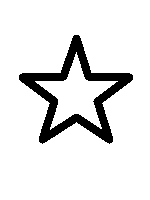

In [21]:
gwiazdka = Image.open("gwiazdka.bmp")
gwiazdka
# oryginał

1


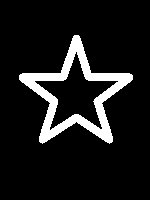

In [27]:
negatyw(gwiazdka)
# negatyw

In [28]:
# b) rysuj_ramki_kolorowe(200, [20, 120,220], a, b, c)
# gdzie a = liczba liter w imieniu, b = liczba liter w nazwisku, c = -a

In [29]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)

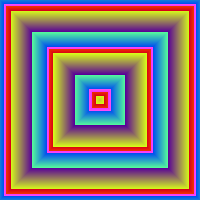

In [30]:
rysuj_ramki_kolorowe(200, [20, 120, 220], 6, 12, -6)
# oryginał

RGB


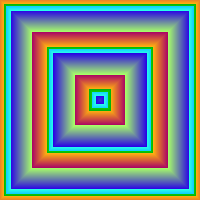

In [31]:
negatyw(rysuj_ramki_kolorowe(200, [20, 120, 220], 6, 12, -6))
# negatyw

In [33]:
# c) rysuj_po_skosie_szare(100, 300, a, b)
# gdzie a = liczba liter w imieniu, b = liczba liter w nazwisku, c = -a

In [34]:
def rysuj_po_skosie_szare(h,w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256
    return Image.fromarray(tab)

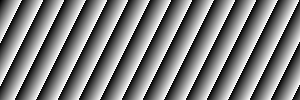

In [35]:
rysuj_po_skosie_szare(100, 300, 6, 12)
# oryginał

L


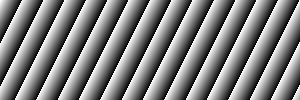

In [36]:
negatyw(rysuj_po_skosie_szare(100, 300, 6, 12))
# negatyw

In [58]:
# Zadanie 3
# Napisz funkcję koloruj_w_paski(obraz, grub, ?) , która dla danego obrazu w trybie ‘1’ (np. czarne
# kształty na białym tle) tworzy obraz w trybie ‘RGB’, w którym tło jest białe a kształty są
# pokolorowane w kolorowe poziome paski grubości grub. Sposób kolorowania (zmianę koloru)
# proszę wcześniej opisać i ewentualnie uwzględnić w argumentach funkcji.

# W argumentach tej funkcji podaj dodatkowy argument "kolor" - kolor początkowy.
# Sposób zmiany koloru jest dowolny, w tym przypadku zrobiłem tak, że każdy następny pasek
# ma filtr red o 15 jednostek większy, filtr green o 55 jednostęk większy, a filter blue o 33.
# Jeżeli jednostki kolorów przekraczają zakres, następuje zawijanie.

In [39]:
def koloruj_w_paski(obraz, grub, kolor):
    if (obraz.mode == "1"):
        obraz_rgb = obraz.convert("RGB")
        tab = np.asarray(obraz_rgb).astype(np.uint8)

        h, w, color = tab.shape
        tab_kolorowa = tab.copy()
        counter = 0
        for i in range(h):
            koloruje = False
            if(counter == grub):
                counter = 0
                kolor = [(kolor[0] + 15) % 256, (kolor[1] + 55) % 256, (kolor[2] + 33) % 256]
            for j in range(w):
                if(tab_kolorowa[i, j][0] == 0):
                    tab_kolorowa[i, j] = kolor
                    koloruje = True
            if(koloruje):
                counter += 1
        return Image.fromarray(tab_kolorowa)


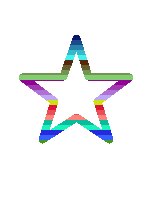

In [40]:
koloruj_w_paski(gwiazdka, 5, [10, 20, 105])

In [45]:
inicjaly_wlasne = Image.open("inicjaly_wlasne.bmp")
inicjaly_wlasne = inicjaly_wlasne.convert("1")
koloruj_w_paski(inicjaly_wlasne, 5, [200, 20, 105]).show()

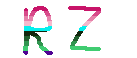

In [51]:
obrazek_inicjaly_png = Image.open("obrazki/obraz_inicjaly_png.PNG")
obrazek_inicjaly_png

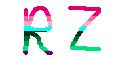

In [53]:
obrazek_inicjaly_jpg = Image.open("obrazki/obraz_inicjaly_jpg.jpg")
obrazek_inicjaly_jpg

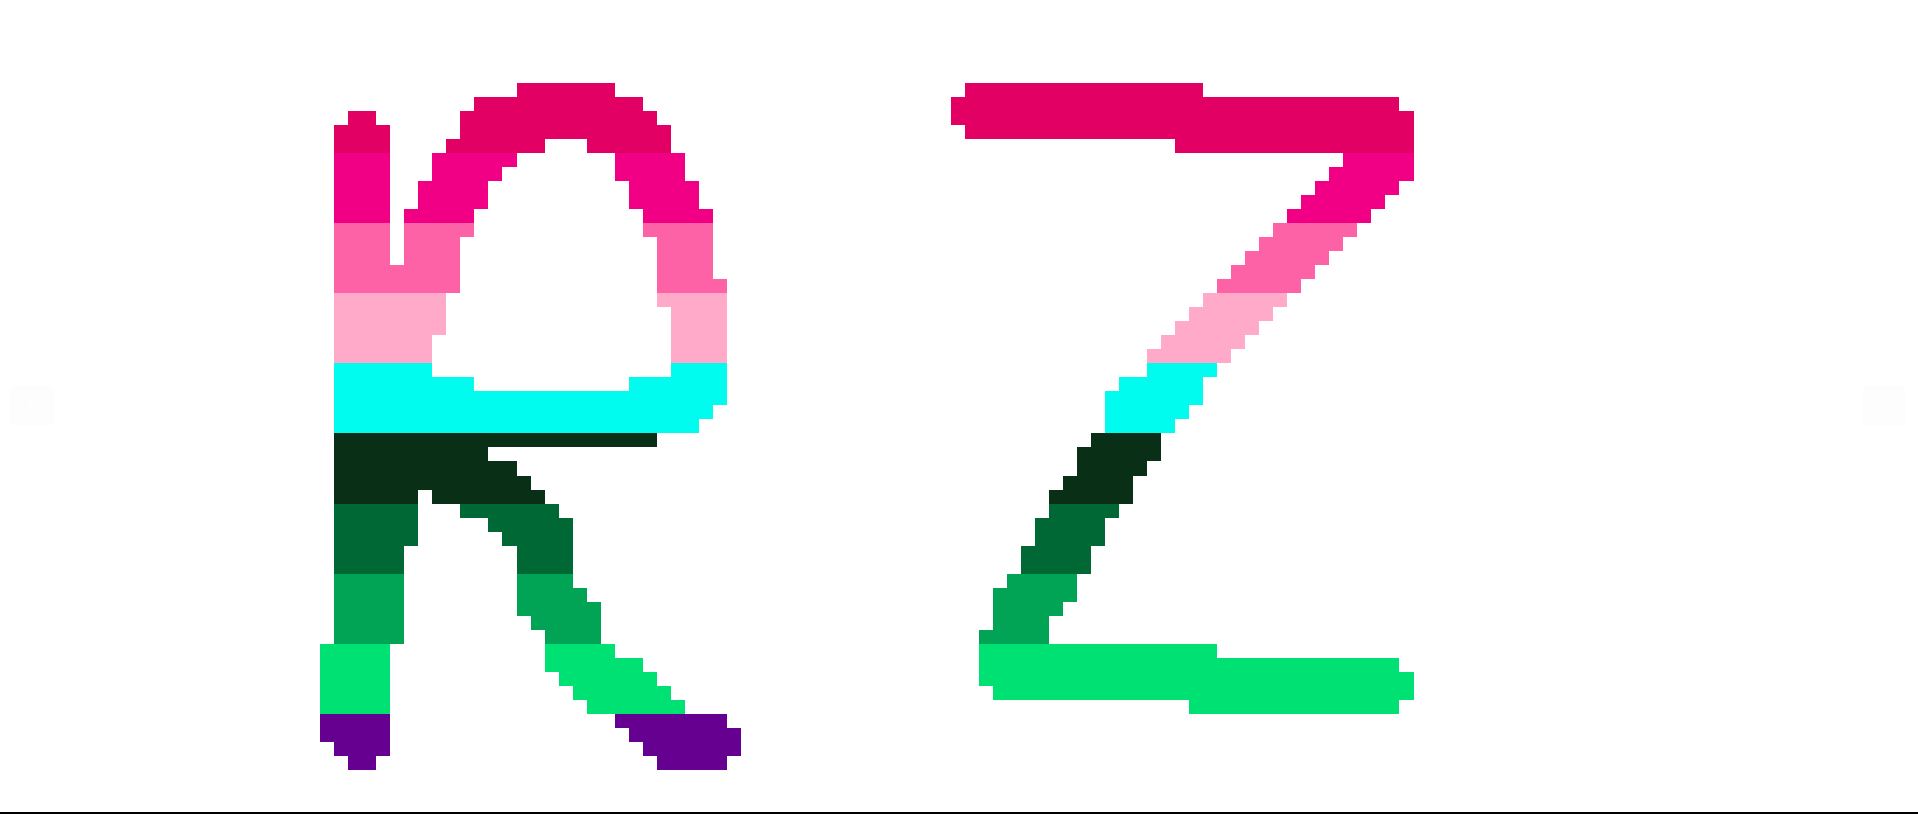

In [54]:
obrazek_lepszy = Image.open("obrazki/lepszy.png")
obrazek_lepszy

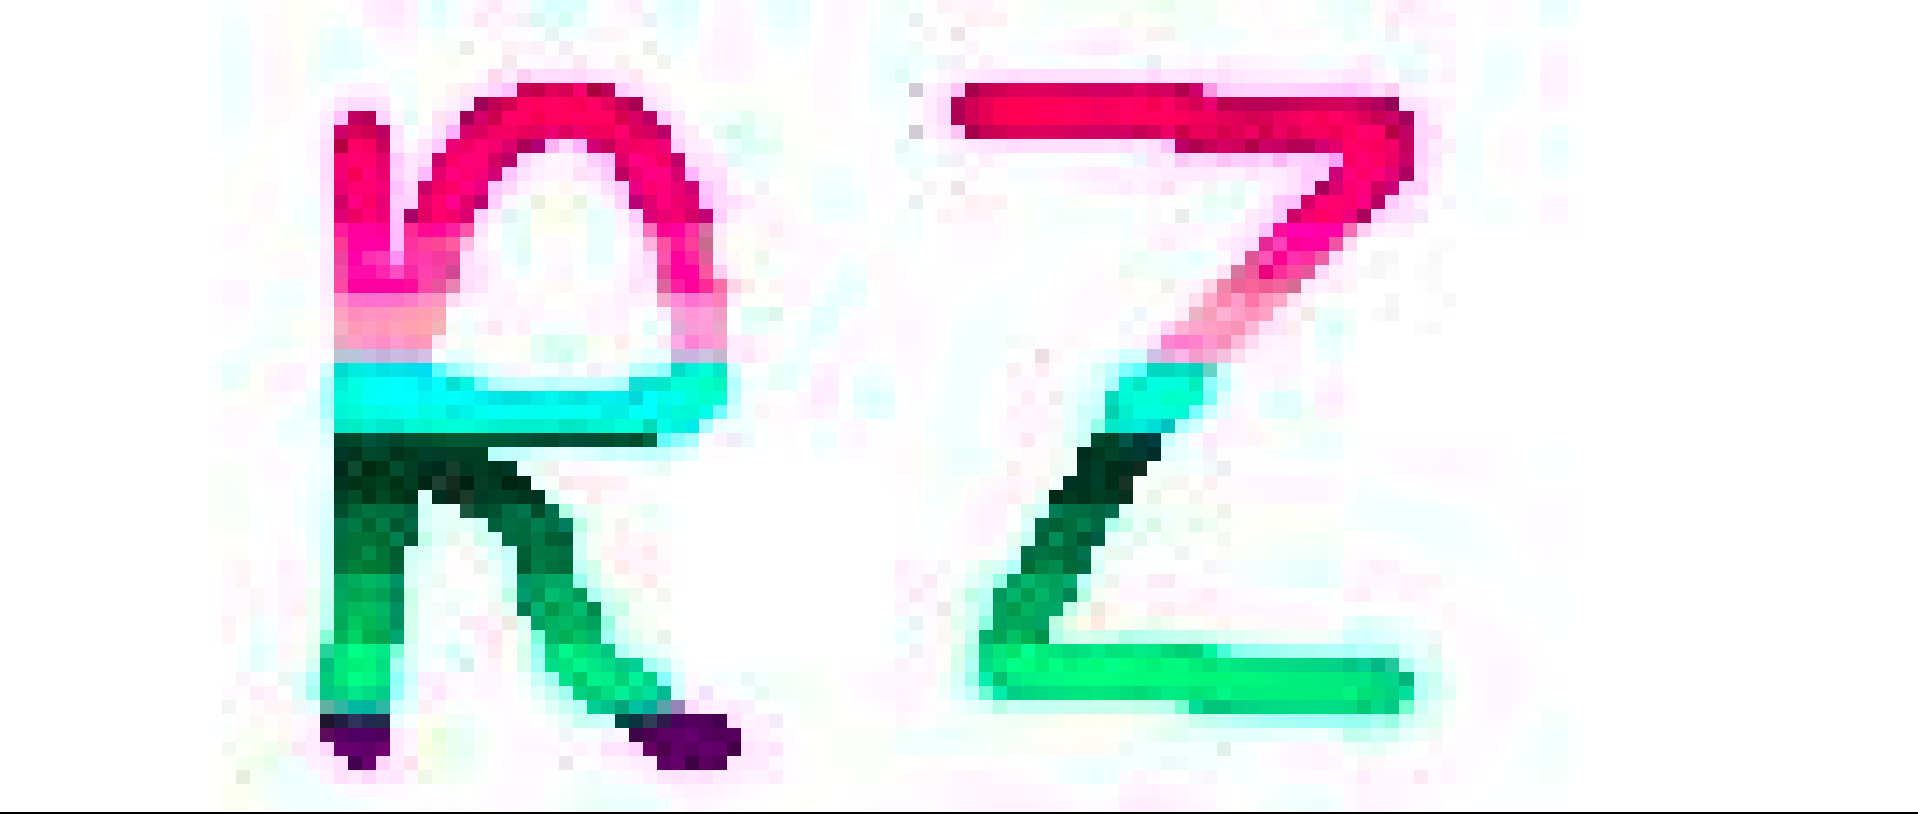

In [55]:
obrazek_gorszy = Image.open("obrazki/gorszy.png")
obrazek_gorszy

In [56]:
# Obrazy zapisane w formatach jpg i png wyglądają podobnie, ale nie są identyczne. Oto powody:

# Format JPG stosuje kompresję stratną, co oznacza, że przy zapisywaniu obrazów w formacie JPG 
# tracimy część informacji o kolorach i detalach obrazu. JPEG próbuje zmniejszyć rozmiar pliku, 
# usuwając mniej istotne informacje, co prowadzi do niewielkiej degradacji jakości obrazu. 

# Format PNG jest formatem bezstratnym, co oznacza, że obraz jest przechowywany bez utraty jakości. 
# Zapisanie obrazu w formacie PNG zachowuje wszystkie szczegóły obrazu, 
# w tym ostre krawędzie i dokładne odwzorowanie kolorów.

In [60]:
# Zadanie 4
# Jak działa typ uint8 w przypadku, gdy podana wartość koloru przekracza 255 lub jest ujemna?
# Jaka wartość będzie, gdy podamy a) 328 b) -24 ?

In [61]:
# Typ uint8 przechowuje liczby całkowite w zakresie od 0 do 255. Jest to liczba bez znaku, 
# co oznacza, że nie może przyjmować wartości ujemnych. Gdy podamy wartość przekraczającą zakres 
# lub wartość ujemną, następuje zawijanie, które działa na zasadzie operacji modulo.

# a) Wartość 328: 328 przekracza 255, więc zostaje przekształcone za pomocą 328 % 256.

print(328%256)

# b) Wartość -24: -24 jest ujemne, więc zostaje przekształcone za pomocą -24 % 256. (256 + (-24))
print(-24 % 256)

72
232


In [62]:
# Chociaż w kodzie trzeba jawnie robić zawijanie. U mnie to nie działało automatycznie

In [63]:
liczba = np.uint8(231)
print(liczba)
liczba2 = np.uint8(290) #nie działa
liczba3 = np.uint8(-100) # nie działa

print(liczba2)
print(liczba3)

231


OverflowError: Python integer 290 out of bounds for uint8

In [64]:
liczba2 = np.uint8(290 % 256) # działa
liczba3 = np.uint8(-100 % 256) # działa

print(liczba2)
print(liczba3)

34
156
